In [7]:
# This file contains a tests to understand basic inverse dynamics
import numpy as np
import pinocchio as pin
from matplotlib import pyplot as plt

from robot_properties_solo.config import Solo12Config

In [37]:
robot = Solo12Config.buildRobotWrapper()
rmodel = robot.model
rdata = robot.data

eff_arr = ["FL_FOOT", "FR_FOOT", "HL_FOOT", "HR_FOOT"]

f = np.load("dat_file/ik.npz")
q, v = f["xs"][:,:robot.model.nq], f["xs"][:,robot.model.nq:]
a = f["us"]
fff = np.load("dat_file/mom.npz")["F_opt"]
fff = np.reshape(fff, (int(len(fff)/12), 12))

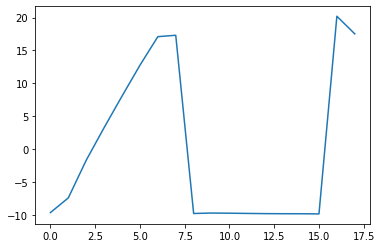

In [71]:
plt.plot(a[:,2])
# plt.plot(fff[:,2])

In [70]:
for i in range(len(fff)):
    tau = np.zeros(robot.model.nv)
    for j in range(len(eff_arr)):
        J = pin.computeFrameJacobian(rmodel, rdata, q[i], rmodel.getFrameId(eff_arr[j]), pin.LOCAL_WORLD_ALIGNED)
        tau += np.matmul(J.T, np.hstack((fff[i][j*3:(j+1)*3], np.zeros(3))))

    # torque from inverse dynamics
    tau_id = pin.rnea(rmodel, rdata, q[i], v[i], a[i])
    
    return tau_id - tau
    

SyntaxError: 'return' outside function (<ipython-input-70-bede623ef477>, line 10)

In [69]:
tau_id - tau

array([-0.1334386 , -0.00386308,  0.1241051 ,  0.05915575, -0.04176608,
        0.00279209, -0.48631739,  0.18431901,  1.56354467,  0.52112304,
        0.18188651,  1.58179589, -0.49235849, -0.20411044, -1.57697643,
        0.52649668, -0.20242384, -1.59634236])